In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
 

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)
import IPython.display
%cd /content/drive/Shareddrives/ML-Final-Project

Mounted at /content/drive
/content/drive/Shareddrives/ML-Final-Project


In [3]:
df = pd.read_csv("data/train_x.csv")
df_y = pd.read_csv("data/train_y.csv")
df.info()

<ipython-input-3-c90b0a14029f>:1: DtypeWarning: Columns (3,4,5,6,7,8,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train_x.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791936 entries, 0 to 791935
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   791936 non-null  int64  
 1   admissionheight              1957 non-null    float64
 2   admissionweight              1856 non-null    float64
 3   age                          2012 non-null    object 
 4   cellattributevalue           1272 non-null    object 
 5   celllabel                    1272 non-null    object 
 6   ethnicity                    1980 non-null    object 
 7   gender                       2012 non-null    object 
 8   labmeasurenamesystem         11919 non-null   object 
 9   labname                      14915 non-null   object 
 10  labresult                    14905 non-null   float64
 11  nursingchartcelltypevalname  773733 non-null  object 
 12  nursingchartvalue            773730 non-null  object 
 13 

In [4]:
full_df = pd.merge(df, df_y, on='patientunitstayid')
full_df.drop('Unnamed: 0_y', axis = 1,inplace=True) 
full_df.drop('Unnamed: 0_x', axis = 1,inplace=True) 
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791936 entries, 0 to 791935
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   admissionheight              1957 non-null    float64
 1   admissionweight              1856 non-null    float64
 2   age                          2012 non-null    object 
 3   cellattributevalue           1272 non-null    object 
 4   celllabel                    1272 non-null    object 
 5   ethnicity                    1980 non-null    object 
 6   gender                       2012 non-null    object 
 7   labmeasurenamesystem         11919 non-null   object 
 8   labname                      14915 non-null   object 
 9   labresult                    14905 non-null   float64
 10  nursingchartcelltypevalname  773733 non-null  object 
 11  nursingchartvalue            773730 non-null  object 
 12  offset                       791936 non-null  float64
 13 

In [5]:
full_df.head()

,admissionheight,admissionweight,age,cellattributevalue,celllabel,ethnicity,gender,labmeasurenamesystem,labname,labresult,nursingchartcelltypevalname,nursingchartvalue,offset,patientunitstayid,unitvisitnumber,hospitaldischargestatus
0,157.5,NaN,87,NaN,NaN,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,0.0,141764.0,2.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heart Rate,98.0,166.0,141764.0,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heart Rate,118.0,256.0,141764.0,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Invasive BP Systolic,176.0,76.0,141764.0,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heart Rate,102.0,269.0,141764.0,NaN,0


In [6]:
full_df['nursingchartcelltypevalname'].unique() #nursingchartcelltypevalname

array([nan, 'Heart Rate', 'Non-Invasive BP Systolic',
       'Non-Invasive BP Mean', 'Non-Invasive BP Diastolic', 'GCS Total',
       'O2 Saturation', 'Respiratory Rate', 'Invasive BP Diastolic',
       'Invasive BP Systolic', 'Invasive BP Mean'], dtype=object)

In [7]:
def data_prep(filename_x, filename_y):
  if(filename_y == ""):

    full_df = pd.read_csv(filename_x) 
    patientunitstayid = []
    num_rows = []
    offset = []
    height = [] 
    weight = []
    gender = []
    avg_glucose = []
    num_visits = []
    avg_ph = []
    coma = []
    avg_coma = []
    avg_heart = []
    age = []
    o2 = []
    resp_rate = []
    bp_mean =[]

    for val in full_df['patientunitstayid'].unique(): 
        temp = full_df[full_df['patientunitstayid'] == val]
        count = len(temp)
        offset.append(temp['offset'].max()) 
        patientunitstayid.append(val)
        num_rows.append(count) 
        max_weight = temp['admissionweight'].max()
        weight.append(max_weight)
        try:
          age_val = full_df[(full_df['patientunitstayid'] == val) & (full_df['age'].notnull())]['age'].iloc[0]
          if age_val == '> 89':
            age_val = 95
            
          age.append(int(age_val))
        except IndexError:
          age.append(None)
        try:
          height_value = full_df[(full_df['patientunitstayid'] == val) & (full_df['admissionheight'].notnull())]['admissionheight'].iloc[0] 
          height.append(height_value)
        except IndexError:
          height.append(None) 
        try:
          gender.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['gender'].notnull())]['gender'].iloc[0])
        except:
          gender.append(None)

        gcs_df = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'GCS Total')] 
        if len(gcs_df) > 0:
            coma.append(len(gcs_df)) 
            gcs_df['nursingchartvalue'] = pd.to_numeric(gcs_df['nursingchartvalue'], errors='coerce')
            gcs_df = gcs_df.dropna(subset=['nursingchartvalue'])
            avg_coma.append(gcs_df['nursingchartvalue'].mean())
        else:
            coma.append(0) 
            avg_coma.append(20)

        heart_rate_df = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Heart Rate')] 
        if len(heart_rate_df) > 0: 
            heart_rate_df['nursingchartvalue'] = pd.to_numeric(heart_rate_df['nursingchartvalue'], errors='coerce')
            heart_rate_df = heart_rate_df.dropna(subset=['nursingchartvalue'])
            avg_heart.append(heart_rate_df['nursingchartvalue'].mean())
        else: 
            avg_heart.append(None)
         
        avg_ph.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['labname'] == 'pH')]['labresult'].mean())
        avg_glucose.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['labname'] == 'glucose')]['labresult'].mean())
        num_visits.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['unitvisitnumber'].notnull())]['unitvisitnumber'].max())
        ##
        ##resp rate
        rr = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Respiratory Rate')] 
        if len(rr) > 0: 
            rr['nursingchartvalue'] = pd.to_numeric(rr['nursingchartvalue'], errors='coerce')
            rr = rr.dropna(subset=['nursingchartvalue'])
            resp_rate.append(rr['nursingchartvalue'].mean())
        else: 
            resp_rate.append(None)
        ##
        ##o2
        o = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'O2 Saturation')] 
        if len(rr) > 0: 
            o['nursingchartvalue'] = pd.to_numeric(o['nursingchartvalue'], errors='coerce')
            o = o.dropna(subset=['nursingchartvalue'])
            o2.append(o['nursingchartvalue'].mean())
        else: 
            o2.append(None)   
        ##bp
        bdf = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Non-Invasive BP Mean')] 
        if len(rr) > 0: 
            bdf['nursingchartvalue'] = pd.to_numeric(o['nursingchartvalue'], errors='coerce')
            bdf = bdf.dropna(subset=['nursingchartvalue'])
            bp_mean.append(bdf['nursingchartvalue'].mean())
        else: 
            bp_mean.append(None)      

    
    new_df = pd.DataFrame({'patientunitstayid': patientunitstayid,'age': age,'gender': gender, 'height':height,'weight':weight,'num_rows': num_rows, 'offset': offset, 'avg_ph':avg_ph,'avg_glucose':avg_glucose, 'num_visits':num_visits,'num_coma_test': coma,'coma_score_avg':avg_coma, 'heart_rate_avg': avg_heart,'resp_rate_avg':resp_rate, 'o2_saturation_avg': o2,'bp_avg':bp_mean})
 
    new_df['height'] = new_df['height'].fillna(new_df['height'].median())
    new_df['weight'] = new_df['weight'].fillna(new_df['weight'].median()) 
    new_df['avg_glucose'] = new_df['avg_glucose'].fillna(new_df['avg_glucose'].median())
    new_df['num_visits'] = new_df['num_visits'].fillna(new_df['num_visits'].median())
    new_df['avg_ph'] = new_df['avg_ph'].fillna(new_df['avg_ph'].median())
    new_df['heart_rate_avg'] = new_df['heart_rate_avg'].fillna(new_df['heart_rate_avg'].median())
    new_df['age'] = new_df['age'].fillna(new_df['age'].median())
    new_df['coma_score_avg'].fillna(20, inplace=True)
    new_df['gender'].fillna(20, inplace=True)
    gender_map = {'Male': 1, 'Female': 0}
    new_df['gender'] = new_df['gender'].map(gender_map)
    new_df['resp_rate_avg'] = new_df['resp_rate_avg'].fillna(new_df['resp_rate_avg'].median())
    new_df['o2_saturation_avg'] = new_df['o2_saturation_avg'].fillna(new_df['o2_saturation_avg'].median())
    new_df['bp_avg'] = new_df['bp_avg'].fillna(new_df['bp_avg'].median())
    return new_df
  else:  
    df = pd.read_csv(filename_x)
    df_y = pd.read_csv(filename_y)
    full_df = pd.merge(df, df_y, on='patientunitstayid')
    full_df.drop('Unnamed: 0_y', axis = 1,inplace=True) 
    full_df.drop('Unnamed: 0_x', axis = 1,inplace=True)
    patientunitstayid = []
    num_rows = []
    offset = []
    height = [] 
    weight = []
    gender = []
    discharge_status = []
    avg_glucose = []
    avg_ph = []
    num_visits = []
    coma = []
    avg_coma = []
    avg_heart = []
    age = []
    o2 = []
    resp_rate = []
    bp_mean =[]

    for val in full_df['patientunitstayid'].unique(): 
         
        temp = full_df[full_df['patientunitstayid'] == val]
        discharge_status.append(temp['hospitaldischargestatus'].iloc[0])
        count = len(temp)
        offset.append(temp['offset'].max()) 
        patientunitstayid.append(val)
        num_rows.append(count) 
        max_weight = temp['admissionweight'].max()
        weight.append(max_weight)
        try:
          age_val = full_df[(full_df['patientunitstayid'] == val) & (full_df['age'].notnull())]['age'].iloc[0]
          if age_val == '> 89':
            age_val = 95
            
          age.append(int(age_val) )
        except IndexError:
          age.append(None)
        try:
          height_value = full_df[(full_df['patientunitstayid'] == val) & (full_df['admissionheight'].notnull())]['admissionheight'].iloc[0]
         
          height.append(height_value)
        except IndexError:
          height.append(None) 
        try:
          gender.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['gender'].notnull())]['gender'].iloc[0])
        except:
          gender.append(None) 
        avg_ph.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['labname'] == 'pH')]['labresult'].mean())
        avg_glucose.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['labname'] == 'glucose')]['labresult'].mean())
        num_visits.append(full_df[(full_df['patientunitstayid'] == val) & (full_df['unitvisitnumber'].notnull())]['unitvisitnumber'].max())
      
        gcs_df = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'GCS Total')] 
        if len(gcs_df) > 0:
            coma.append(len(gcs_df)) 
            gcs_df['nursingchartvalue'] = pd.to_numeric(gcs_df['nursingchartvalue'], errors='coerce')
            gcs_df = gcs_df.dropna(subset=['nursingchartvalue'])
            avg_coma.append(gcs_df['nursingchartvalue'].mean())
        else:
            coma.append(0) 
            avg_coma.append(20)

        heart_rate_df = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Heart Rate')] 
        if len(heart_rate_df) > 0: 
            heart_rate_df['nursingchartvalue'] = pd.to_numeric(heart_rate_df['nursingchartvalue'], errors='coerce')
            heart_rate_df = heart_rate_df.dropna(subset=['nursingchartvalue'])
            avg_heart.append(heart_rate_df['nursingchartvalue'].mean())
        else: 
            avg_heart.append(None)
        ##
        ##resp rate
        rr = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Respiratory Rate')] 
        if len(rr) > 0: 
            rr['nursingchartvalue'] = pd.to_numeric(rr['nursingchartvalue'], errors='coerce')
            rr = rr.dropna(subset=['nursingchartvalue'])
            resp_rate.append(rr['nursingchartvalue'].mean())
        else: 
            resp_rate.append(None)
        #o2    
        o = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'O2 Saturation')] 
        if len(rr) > 0: 
            o['nursingchartvalue'] = pd.to_numeric(o['nursingchartvalue'], errors='coerce')
            o = o.dropna(subset=['nursingchartvalue'])
            o2.append(o['nursingchartvalue'].mean())
        else: 
            o2.append(None)   
        #bp 
        bdf = full_df[(full_df['patientunitstayid'] == val) & (full_df['nursingchartcelltypevalname'] == 'Non-Invasive BP Mean')] 
        if len(rr) > 0: 
            bdf['nursingchartvalue'] = pd.to_numeric(o['nursingchartvalue'], errors='coerce')
            bdf = bdf.dropna(subset=['nursingchartvalue'])
            bp_mean.append(bdf['nursingchartvalue'].mean())
        else: 
            bp_mean.append(None)      

    new_df = pd.DataFrame({'patientunitstayid': patientunitstayid,'age': age, 'gender': gender, 'height':height,'weight':weight,'num_rows': num_rows, 'offset': offset, 'avg_ph':avg_ph,'avg_glucose':avg_glucose, 'num_visits':num_visits,'num_coma_test': coma,'coma_score_avg':avg_coma, 'heart_rate_avg': avg_heart,'resp_rate_avg':resp_rate, 'o2_saturation_avg': o2,'bp_avg':bp_mean, 'dischargestatus':discharge_status})
 
    new_df['height'] = new_df['height'].fillna(new_df['height'].median())
    new_df['weight'] = new_df['weight'].fillna(new_df['weight'].median()) 
    new_df['avg_glucose'] = new_df['avg_glucose'].fillna(new_df['avg_glucose'].median())
    new_df['avg_ph'] = new_df['avg_ph'].fillna(new_df['avg_ph'].median())
    new_df['num_visits'] = new_df['num_visits'].fillna(new_df['num_visits'].median())
    new_df['heart_rate_avg'] = new_df['heart_rate_avg'].fillna(new_df['heart_rate_avg'].median())
    new_df['age'] = new_df['age'].fillna(new_df['age'].median())
 
    new_df['gender'].fillna(1, inplace=True)
    new_df['coma_score_avg'].fillna(20, inplace=True)
    gender_map = {'Male': 1, 'Female': 0}
    new_df['gender'] = new_df['gender'].map(gender_map)
    new_df['resp_rate_avg'] = new_df['resp_rate_avg'].fillna(new_df['resp_rate_avg'].median())
    new_df['o2_saturation_avg'] = new_df['o2_saturation_avg'].fillna(new_df['o2_saturation_avg'].median())
    new_df['bp_avg'] = new_df['bp_avg'].fillna(new_df['bp_avg'].median())
    return new_df


In [8]:
train_df = data_prep("data/train_x.csv","data/train_y.csv") 
test_df = data_prep("data/test_x.csv", "")
X = train_df.drop(['patientunitstayid','dischargestatus'], axis=1)
y = train_df['dischargestatus']
 

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['nursingchartvalue'] = pd.to_numeric(rr['nursingchartvalue'], errors='coerce')
<ipython-input-7-4daa118b34c7>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['nursingchartvalue'] = pd.to_numeric(o['nursingchartvalue'], errors='coerce')
<ipython-input-7-4daa118b34c7>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [9]:
train_df['gender'].fillna(1, inplace=True)
test_df['gender'].fillna(1, inplace=True)
X['gender'].fillna(1, inplace=True)

In [10]:
# '''
#         RANDOM FOREST MODEL
# '''
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the random forest classifier
# rf = RandomForestClassifier()

# # Create the grid search object
# grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X.drop(['gender','num_visits'],axis=1) , y )

# # Print the best hyperparameters and the corresponding mean validation score
# print('Best hyperparameters: ', grid_search.best_params_)
# print('Best mean validation score: {:.3f}'.format(grid_search.best_score_))

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best mean validation score: 0.932


In [11]:
# '''
#         LOGISTIC REGRESSION MODEL
# '''
# from sklearn.linear_model import LogisticRegression
# param_grid = {
#     'penalty': ["l1", "l2", "l1_l2", "elasticnet", "None"],
#     'C': [ .001, .001, .1, 1, 3, 10, 25],
#     'max_iter': [50, 100, 250]
# }

# # Create the Logistic Regression Model
# model = LogisticRegression()

# # Create the grid search object
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X.drop(['gender','num_visits'],axis=1) , y )

# # Print the best hyperparameters and the corresponding mean validation score
# print('Best hyperparameters: ', grid_search.best_params_)
# print('Best mean validation score: {:.3f}'.format(grid_search.best_score_))



Best hyperparameters:  {'C': 0.1, 'max_iter': 250, 'penalty': 'l2'}
Best mean validation score: 0.925


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [12]:
'''
        XGBOOST MODEL
'''
import xgboost as xgb

param_grid = {
    'booster': ['gbtree'],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 250, 500],
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [0.5, 0.75, 1],
    'min_child_weight': [1, 5, 10], 
    'subsample': [0.5, 0.75, 1.0], 
    'colsample_bytree': [0.5, 0.75, 1.0], 
    'gamma': [0, 0.1, 0.5],
    'scale_pos_weight': [1, 2, 5],
    'max_delta_step': [0], 
}


# Create the Logistic Regression Model
modelXG = xgb.XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(modelXG, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X.drop(['gender','num_visits'],axis=1) , y )

# Print the best hyperparameters and the corresponding mean validation score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best mean validation score: {:.3f}'.format(grid_search.best_score_))

Best hyperparameters:  {'booster': 'gbtree', 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 250, 'reg_alpha': 0.5, 'reg_lambda': 0.75, 'scale_pos_weight': 1, 'subsample': 1.0}
Best mean validation score: 0.926


In [13]:
train_df.corr()

,patientunitstayid,age,gender,height,weight,num_rows,offset,avg_ph,avg_glucose,num_visits,num_coma_test,coma_score_avg,heart_rate_avg,resp_rate_avg,o2_saturation_avg,bp_avg,dischargestatus
patientunitstayid,1.000000,0.049165,0.149890,0.016400,0.067108,0.071027,0.095303,-0.059582,-0.031939,-0.105198,0.027666,0.145866,-0.029240,-0.012511,0.000338,-0.016164,0.044813
age,0.049165,1.000000,-0.053517,-0.078944,-0.107530,0.046374,0.082513,0.048905,-0.114091,0.043969,0.039387,-0.044406,-0.180068,0.086609,-0.140266,-0.046009,0.159410
gender,0.149890,-0.053517,1.000000,0.427689,0.243525,0.007636,0.022709,0.011448,0.024534,-0.008392,-0.027326,0.047626,-0.057934,-0.036072,-0.001268,-0.025622,0.001835
height,0.016400,-0.078944,0.427689,1.000000,0.243697,-0.025813,-0.021941,0.018128,0.006898,0.006544,-0.016009,0.006223,-0.055351,-0.047681,0.024915,0.004827,-0.022196
weight,0.067108,-0.107530,0.243525,0.243697,1.000000,-0.007610,0.027373,-0.024109,0.066934,-0.014817,-0.006403,0.040173,-0.029371,-0.000999,-0.048688,0.001316,-0.055352
num_rows,0.071027,0.046374,0.007636,-0.025813,-0.007610,1.000000,0.596366,0.049995,-0.033262,0.020737,0.441215,-0.189562,0.089133,0.122997,0.030764,0.024180,0.116326
offset,0.095303,0.082513,0.022709,-0.021941,0.027373,0.596366,1.000000,0.070107,-0.072712,-0.025423,0.391077,-0.112765,0.061587,0.108040,0.060708,0.027780,-0.010394
avg_ph,-0.059582,0.048905,0.011448,0.018128,-0.024109,0.049995,0.070107,1.000000,-0.131693,0.042500,0.049830,0.000310,-0.066719,-0.025961,0.034733,0.005563,-0.139503
avg_glucose,-0.031939,-0.114091,0.024534,0.006898,0.066934,-0.033262,-0.072712,-0.131693,1.000000,-0.070839,-0.029658,0.005897,0.143653,0.032257,0.019222,0.003709,0.045133
num_visits,-0.105198,0.043969,-0.008392,0.006544,-0.014817,0.020737,-0.025423,0.042500,-0.070839,1.000000,-0.006349,-0.036242,0.001339,0.023066,-0.049769,-0.045798,-0.001449


In [14]:
# '''
#         RANDOM FOREST PREDICTIONS
# '''
# best_params = grid_search.best_params_ 
# rf =  RandomForestClassifier(n_estimators=best_params['n_estimators'], 
#                                    max_depth=best_params['max_depth'], 
#                                    min_samples_split=best_params['min_samples_split'])  
 
# rf.fit(X.drop(['gender','num_visits'],axis=1)   , y) 
 
# preds = rf.predict_proba(test_df.drop(['patientunitstayid','gender','num_visits' ] ,axis=1))[:, 1]
 
# df = pd.DataFrame({'patientunitstayid': test_df['patientunitstayid'].astype('int32'), 'hospitaldischargestatus': preds}) 
# df.to_csv('prediction.csv', index=False)
 

KeyError: ignored

In [ ]:
# '''
#         LOGISTIC REGRESSION PREDICTIONS
# '''
# best_params = grid_search.best_params_ 
# model =  LogisticRegression(penalty=best_params['penalty'], 
#                                    C=best_params['C'], 
#                                    max_iter=best_params['max_iter'])  
 
# model.fit(X.drop(['gender','num_visits'],axis=1)   , y) 
 
# preds = model.predict_proba(test_df.drop(['patientunitstayid','gender','num_visits' ] ,axis=1))[:, 1]
 
# df = pd.DataFrame({'patientunitstayid': test_df['patientunitstayid'].astype('int32'), 'hospitaldischargestatus': preds}) 
# df.to_csv('predictionLogReg.csv', index=False)

In [15]:
'''
        XGBOOST PREDICTIONS
'''
best_params = grid_search.best_params_ 
modelXG = xgb.XGBClassifier(
    booster=best_params['booster'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    min_child_weight=best_params['min_child_weight'], 
    subsample=best_params['subsample'], 
    colsample_bytree=best_params['colsample_bytree'], 
    gamma=best_params['gamma'],
    scale_pos_weight=best_params['scale_pos_weight'],
    max_delta_step=best_params['max_delta_step'] 
) 
 
modelXG.fit(X.drop(['gender','num_visits'],axis=1)   , y) 
 
preds = modelXG.predict_proba(test_df.drop(['patientunitstayid','gender','num_visits' ] ,axis=1))[:, 1]
 
df = pd.DataFrame({'patientunitstayid': test_df['patientunitstayid'].astype('int32'), 'hospitaldischargestatus': preds}) 
df.to_csv('predictionXG.csv', index=False)

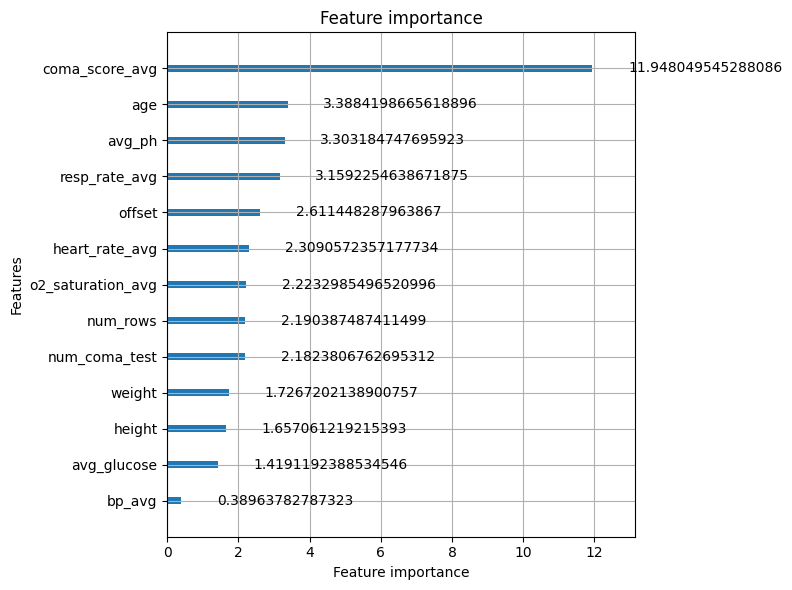

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
xgb.plot_importance(modelXG, ax=ax, importance_type='gain', xlabel='Feature importance', ylabel='Features')
plt.tight_layout()
plt.show()